In [6]:
import numpy as np

import sys
sys.path.append('..')  # This moves one directory up

from neural_network.network import Network
from neural_network.layers import Dense
from neural_network.cost import Cost
from neural_network.optimizer import Optimizer

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = 'C:/GitHub/nn_from_scratch_python/data/housing.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data = data.drop(columns=['longitude', 'latitude', 'ocean_proximity'])

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

In [8]:
network = Network(
    layers=[
        Dense(X.shape[1], 10, "relu"), 
        Dense(10, 10, "relu"), 
        Dense(10, 1, "none")
    ], 
    cost=Cost("MSE")
)

In [9]:
training_progress = network.train(X, Y, 5000, learning_rate=0.005, validation_split=0.2)

X_train shape: (6, 16346)
First 5 elements of Y_train: [ 0.65003673 -0.49868315  0.95151072  0.52615517 -0.15216132]
X_val shape: (6, 4087)
First 5 elements of Y_val: [-0.70919516  1.33441734 -0.69966581 -0.5082125  -0.55239403]


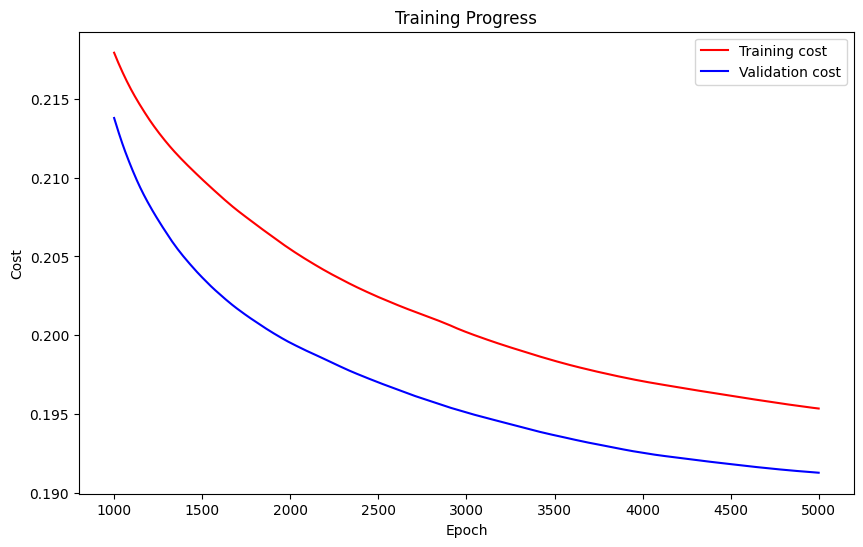

In [12]:
import matplotlib.pyplot as plt

ignore_first_n = 1000

costs = training_progress['cost'][ignore_first_n:]
val_costs = training_progress['val_cost'][ignore_first_n:]

plt.figure(figsize=(10, 6))
plt.plot(range(ignore_first_n, len(costs) + ignore_first_n), costs, 'r-', label='Training cost')
plt.plot(range(ignore_first_n, len(val_costs) + ignore_first_n), val_costs, 'b-', label='Validation cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.legend()
plt.show()